4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 150)               45150     
                                                                 
 dense_3 (Dense)             (None, 100)               15100     
                                                                 
 dense_4 (Dense)             (None, 64)                6464      
                                

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


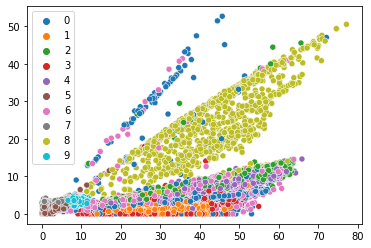

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


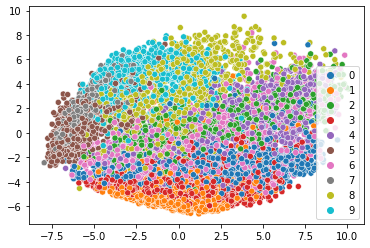

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
#from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
(x_train, _), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)
input = layers.Input(shape=(784))
x = layers.Dense(500,activation = 'relu')(input)
x = layers.Dense(300,activation = 'relu')(x)
x = layers.Dense(150,activation = 'relu')(x)
x = layers.Dense(100,activation = 'relu')(x)
x = layers.Dense(64,activation = 'relu')(x)
x = layers.Dense(32,activation = 'relu')(x)
x = layers.Dense(16,activation = 'relu')(x)
x = layers.Dense(8,activation = 'relu')(x)
code = layers.Dense(2,activation = 'relu',name='code')(x)
x = layers.Dense(8,activation = 'relu')(code)
x = layers.Dense(16,activation = 'relu')(x)
x = layers.Dense(32,activation = 'relu')(x)
x = layers.Dense(64,activation = 'relu')(x)
x = layers.Dense(100,activation = 'relu')(x)
x = layers.Dense(300,activation = 'relu')(x)
x = layers.Dense(500,activation = 'relu')(x)
output = layers.Dense(784,activation = 'relu')(x)

autoencoder = Model(input,output)

autoencoder.summary()
#tf.keras.utils.plot_model(autoencoder)
intermediate_from_a = autoencoder.get_layer("code").output
model_a = Model(inputs=input, outputs=intermediate_from_a)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
autoencoder.fit(x_train, x_train,
                epochs=50,
                shuffle=True,
                validation_data=(x_test, x_test))
latentspace = model_a.predict(x_test)
print(latentspace.shape)


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


x = latentspace[:,0]
y = latentspace[:,1]



sns.scatterplot(x, y,hue=y_test,palette=sns.color_palette())

plt.show()


from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
pca_latent = pca.fit_transform(x_test)

x = pca_latent[:,0]
y = pca_latent[:,1]



sns.scatterplot(x, y,hue=y_test,palette=sns.color_palette())

plt.show()
